## Netflix Movies and TV Shows - Exploratory Data Analysis (EDA)

This project explores the Netflix dataset to uncover patterns in content types, release years, ratings, genres, and countries. 
We'll answer key questions like:
- What types of content are most common on Netflix?
- Which genres are most popular?
- Which countries contribute the most content?
- How has content volume changed over time?

Let's begin!

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Load the Dataset:

In [22]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Understanding the Data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Convert and Extract Dates:

In [24]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df[['title','year_added', 'month_added']].head(10)

,title,year_added,month_added
0,Dick Johnson Is Dead,2021.0,9.0
1,Blood & Water,2021.0,9.0
2,Ganglands,2021.0,9.0
3,Jailbirds New Orleans,2021.0,9.0
4,Kota Factory,2021.0,9.0
5,Midnight Mass,2021.0,9.0
6,My Little Pony: A New Generation,2021.0,9.0
7,Sankofa,2021.0,9.0
8,The Great British Baking Show,2021.0,9.0
9,The Starling,2021.0,9.0


## Genre Cleanup:

In [25]:
df['genre'] = df['listed_in'].dropna().apply(lambda x: x.split(', ')[0])
df['genre'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: genre, dtype: object

# Exploratory Data Analysis(EDA)

## Count of Movies vs TV Shows:

C:\Users\karan\AppData\Local\Temp\ipykernel_16732\200309282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


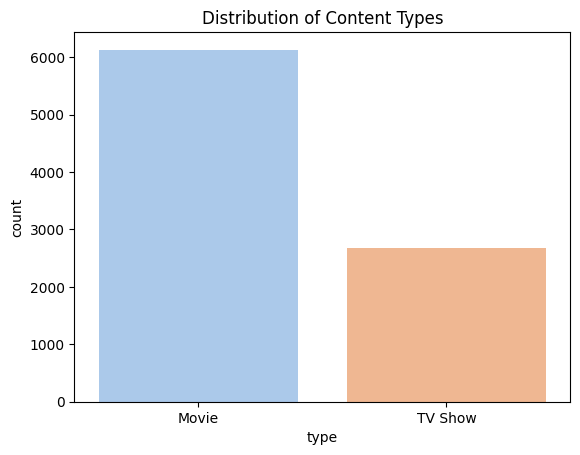

In [36]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Types')
plt.show()

## Top 10 Most Common Genres on Netflix:

C:\Users\karan\AppData\Local\Temp\ipykernel_16732\13927260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_genres_df, x='Count', y='Genre', palette='coolwarm')


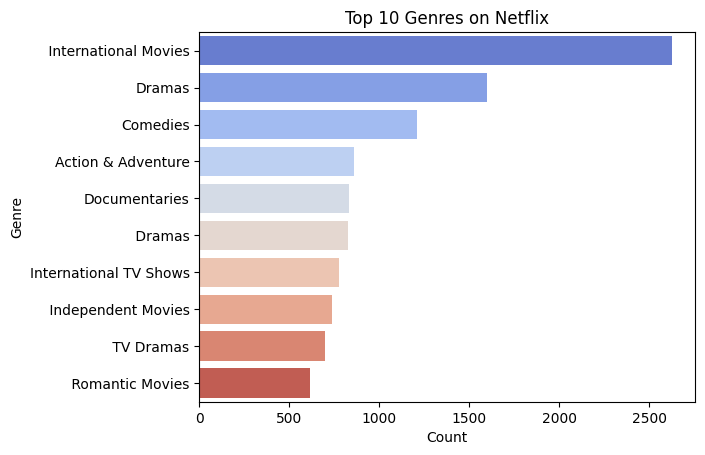

In [44]:
all_genre = df['listed_in'].dropna().str.cat(sep=',').split(',')

top_genres = Counter(all_genre).most_common(10)

top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

sns.barplot(data= top_genres_df, x='Count', y='Genre', palette='coolwarm')
plt.title("Top 10 Genres on Netflix")
plt.show()

## Ratings bye Genre:

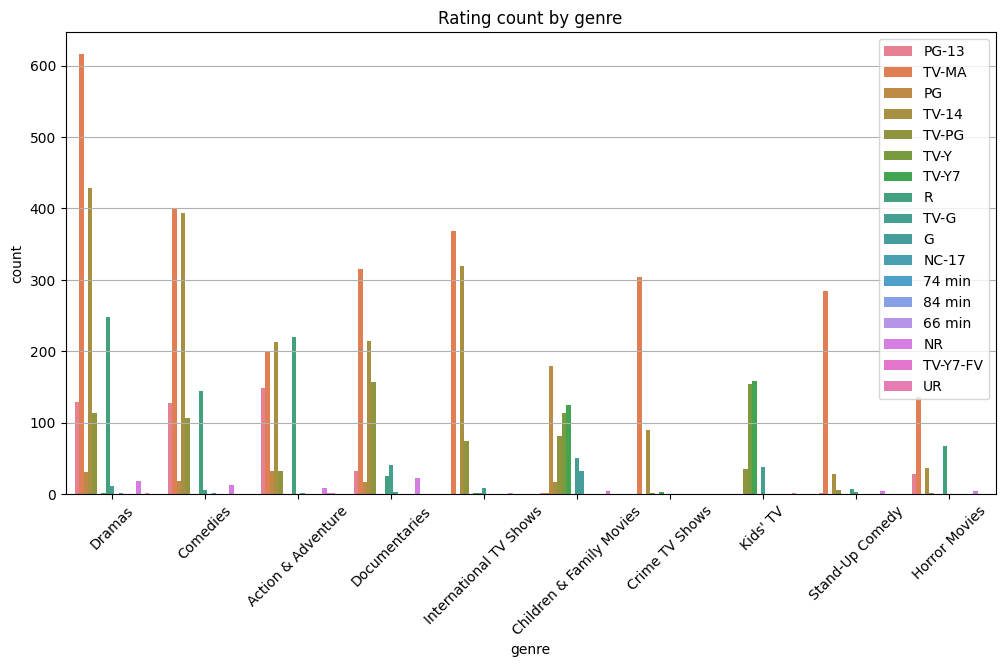

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x= 'genre', hue= 'rating', order=df['genre'].value_counts().index[:10])
plt.title('Rating count by genre')
plt.xticks(rotation= 45)
plt.legend()
plt.grid(axis='y')
plt.show()

## Top 10 Content-Producing Countries:

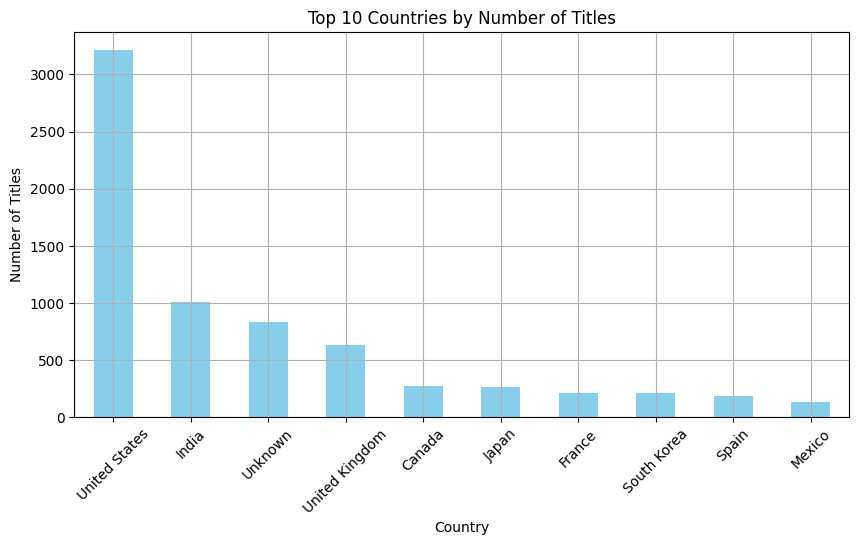

In [46]:
df['country'] = df['country'].fillna('Unknown')
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])
top_countries = df['main_country'].value_counts().head(10)

top_countries.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Content Added Over the Years:

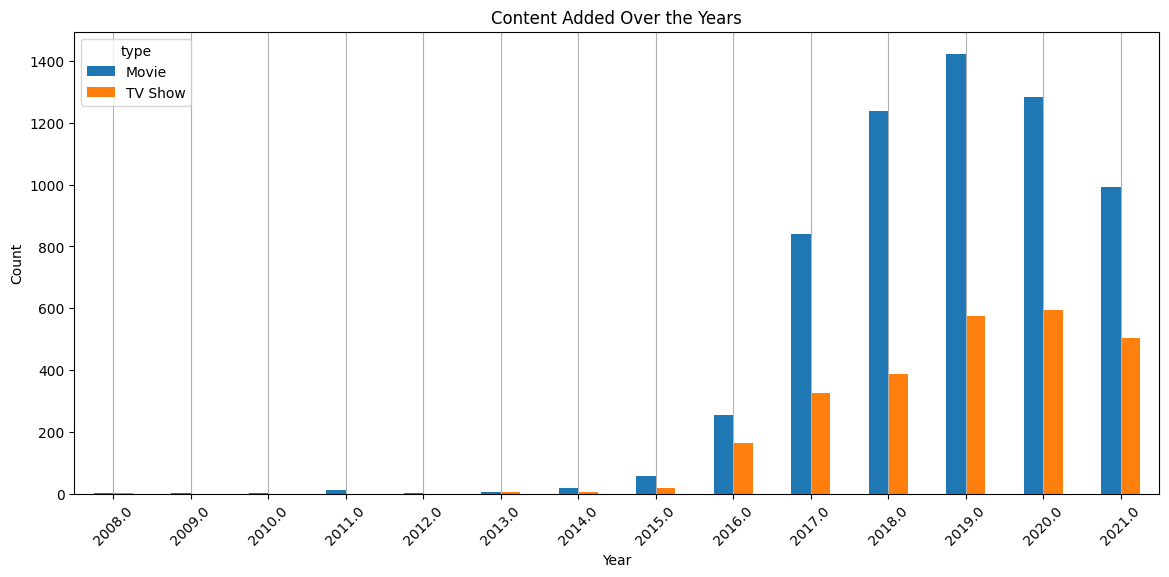

In [35]:
type_by_year = df.groupby(['year_added', 'type']).size().unstack()
type_by_year.plot(kind='bar', figsize=(14,6))
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='x')
plt.xticks(rotation= 45)
plt.show()